In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pickle
# import folium
# import statsmodels.api as sm
# from statsmodels.tsa.seasonal import STL
# from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge

from PIL import Image
# from typing import Callable
# from datetime import datetime
from helper_functions import *
from skimage.morphology import *
import cv2

In [38]:
# load images 
chf = np.array(Image.open('./ref/ref_chf.JPG'))
eur = np.array(Image.open('./ref/ref_eur.JPG'))
neutral = np.array(Image.open('./train/1. neutral_bg/L1010300.JPG'))
noisy = np.array(Image.open('./train/2. noisy_bg/L1010325.JPG'))
noisy2 = np.array(Image.open('./train/2. noisy_bg/L1010370.JPG'))
hand = np.array(Image.open('./train/3. hand/L1010373.JPG'))
hand2 = np.array(Image.open('./train/3. hand/L1010378.JPG'))
hand_outlier = np.array(Image.open('./train/6. hand_outliers/L1010521.JPG'))

In [39]:
# resizing & blurring
scale_percent = 10  
kernel = (3,3)
chf_rb = project_resize_and_blur_image('./ref/ref_chf.JPG',scale_percent,kernel)
euro_rb = project_resize_and_blur_image('./ref/ref_eur.JPG',scale_percent,kernel)
neutral_rb = project_resize_and_blur_image('./train/1. neutral_bg/L1010300.JPG',scale_percent,kernel)
noisy_rb = project_resize_and_blur_image('./train/2. noisy_bg/L1010325.JPG',scale_percent,kernel)
noisy_rb2 = project_resize_and_blur_image('./train/2. noisy_bg/L1010370.JPG',scale_percent,kernel)
hand_rb = project_resize_and_blur_image('./train/3. hand/L1010373.JPG',scale_percent,kernel)
hand_rb2 = project_resize_and_blur_image('./train/3. hand/L1010378.JPG',scale_percent,kernel)
hand_outlier_rb = project_resize_and_blur_image('./train/6. hand_outliers/L1010521.JPG',scale_percent,kernel)

In [40]:
# thresholding

hs_values = ((0.058, 0.13), (0.1, 0.85))
chf_rb_th = project_apply_hsv_threshold(chf_rb, hs_values)
euro_rb_th = project_apply_hsv_threshold(euro_rb, hs_values)
neutral_rb_th = project_apply_hsv_threshold(neutral_rb, hs_values)
noisy_rb_th = project_apply_hsv_threshold(noisy_rb, hs_values)
noisy_rb_th2 = project_apply_hsv_threshold(noisy_rb2, hs_values)
hand_rb_th = project_apply_hsv_threshold(hand_rb, hs_values)
hand_rb_th2 = project_apply_hsv_threshold(hand_rb2, hs_values)
hand_outlier_rb_th = project_apply_hsv_threshold(hand_outlier_rb, hs_values)

Number of circles detected: 14
Circle 1: Center at (660, 2600), Radius: 380
Circle 2: Center at (680, 1460), Radius: 370
Circle 3: Center at (4020, 1380), Radius: 240
Circle 4: Center at (1580, 1540), Radius: 360
Circle 5: Center at (2440, 2620), Radius: 300
Circle 6: Center at (2500, 1520), Radius: 280
Circle 7: Center at (4000, 2520), Radius: 250
Circle 8: Center at (3200, 2560), Radius: 240
Circle 9: Center at (1540, 2720), Radius: 340
Circle 10: Center at (4680, 1380), Radius: 220
Circle 11: Center at (4640, 2560), Radius: 230
Circle 12: Center at (3340, 1420), Radius: 210
Circle 13: Center at (5400, 1400), Radius: 200
Circle 14: Center at (5420, 2500), Radius: 210


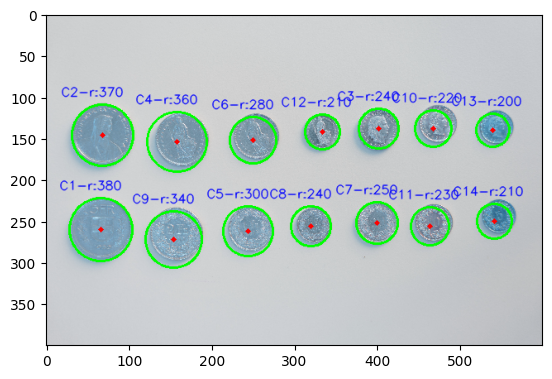

In [30]:
# detect circles (visualiziation)
circles_chf = project_detect_and_annotate_circles(chf,chf_rb_th,scale_percent, show = True)

Number of circles detected: 8
Circle 1: Center at (2280, 1880), Radius: 280
Circle 2: Center at (3040, 1900), Radius: 280
Circle 3: Center at (1460, 1920), Radius: 290
Circle 4: Center at (660, 1940), Radius: 310
Circle 5: Center at (600, 2840), Radius: 290
Circle 6: Center at (1460, 2840), Radius: 250
Circle 7: Center at (3740, 1900), Radius: 270
Circle 8: Center at (2260, 2860), Radius: 190


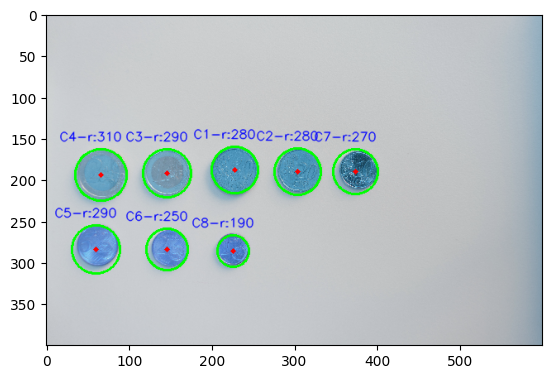

In [31]:
circles_eur = project_detect_and_annotate_circles(eur,euro_rb_th,scale_percent, show =True)

Number of circles detected: 5
Circle 1: Center at (2600, 2180), Radius: 320
Circle 2: Center at (2440, 3040), Radius: 320
Circle 3: Center at (3140, 1280), Radius: 340
Circle 4: Center at (1340, 1960), Radius: 320
Circle 5: Center at (2000, 1340), Radius: 270


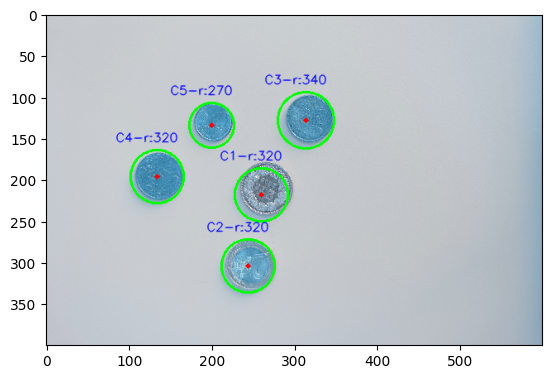

In [41]:
circles_neutral = project_detect_and_annotate_circles(neutral,neutral_rb_th,scale_percent, show = True)

Number of circles detected: 5
Circle 1: Center at (2840, 1260), Radius: 290
Circle 2: Center at (3520, 1180), Radius: 250
Circle 3: Center at (2260, 2180), Radius: 390
Circle 4: Center at (3440, 2240), Radius: 280
Circle 5: Center at (4000, 1440), Radius: 190


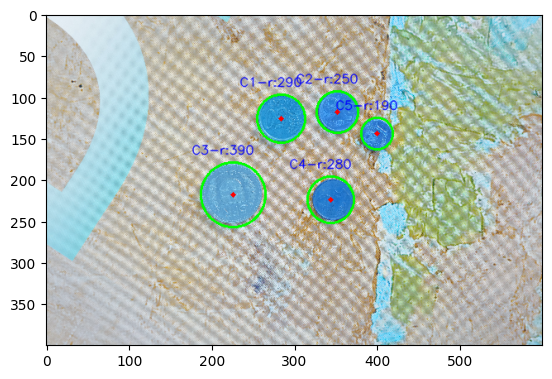

In [32]:
circles_noisy = project_detect_and_annotate_circles(noisy,noisy_rb_th,scale_percent, show = True)

Number of circles detected: 16
Circle 1: Center at (1420, 1040), Radius: 230
Circle 2: Center at (1840, 1380), Radius: 200
Circle 3: Center at (4320, 1040), Radius: 290
Circle 4: Center at (1900, 2840), Radius: 230
Circle 5: Center at (4940, 1980), Radius: 420
Circle 6: Center at (1860, 2340), Radius: 200
Circle 7: Center at (2480, 1380), Radius: 210
Circle 8: Center at (1160, 2820), Radius: 300
Circle 9: Center at (1540, 1840), Radius: 270
Circle 10: Center at (2600, 2400), Radius: 300
Circle 11: Center at (3680, 1280), Radius: 250
Circle 12: Center at (3160, 1120), Radius: 210
Circle 13: Center at (2620, 3040), Radius: 300
Circle 14: Center at (3300, 2860), Radius: 280
Circle 15: Center at (4300, 3000), Radius: 290
Circle 16: Center at (3100, 1940), Radius: 190


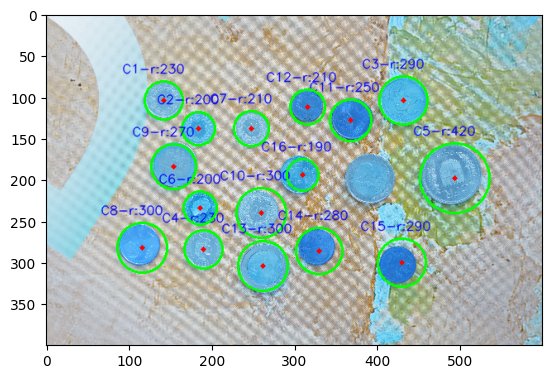

In [34]:
circles_noisy2 = project_detect_and_annotate_circles(noisy2,noisy_rb_th2,scale_percent, show = True)

Number of circles detected: 3
Circle 1: Center at (3560, 1940), Radius: 300
Circle 2: Center at (2800, 1860), Radius: 310
Circle 3: Center at (3140, 2600), Radius: 330


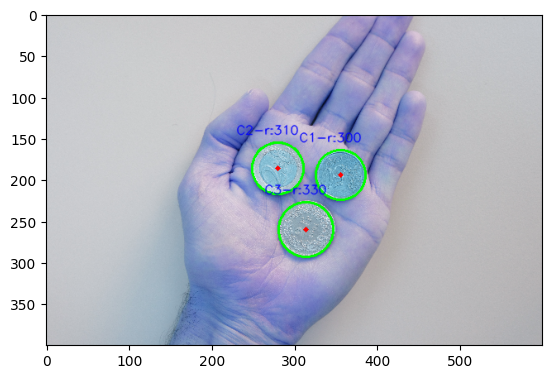

In [35]:
circles_hand = project_detect_and_annotate_circles(hand,hand_rb_th,scale_percent, show = True)

Number of circles detected: 5
Circle 1: Center at (2520, 2700), Radius: 300
Circle 2: Center at (3240, 2920), Radius: 220
Circle 3: Center at (3000, 2340), Radius: 240
Circle 4: Center at (3500, 1980), Radius: 270
Circle 5: Center at (2340, 1960), Radius: 340


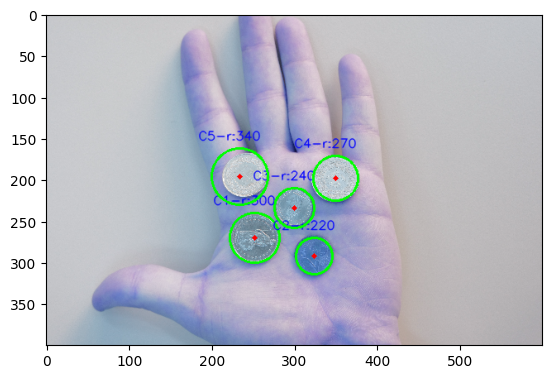

In [36]:
circles_hand = project_detect_and_annotate_circles(hand2,hand_rb_th2,scale_percent, show = True)

Number of circles detected: 3
Circle 1: Center at (3480, 1260), Radius: 380
Circle 2: Center at (3160, 2360), Radius: 300
Circle 3: Center at (2720, 1920), Radius: 280


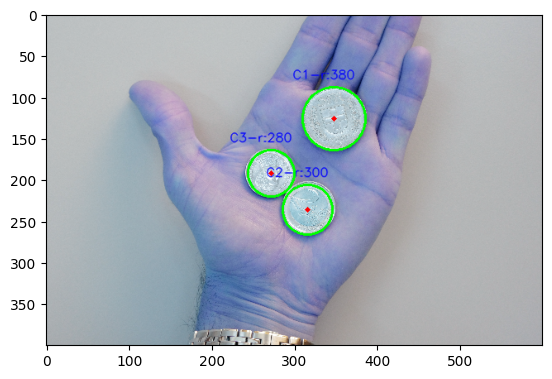

In [42]:
circles_hand_outlier = project_detect_and_annotate_circles(hand_outlier,hand_outlier_rb_th,scale_percent, show = True)

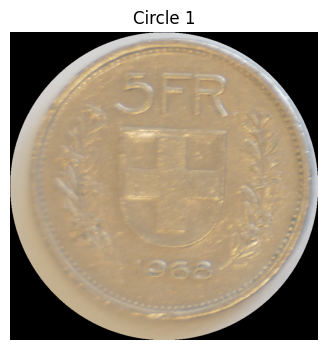

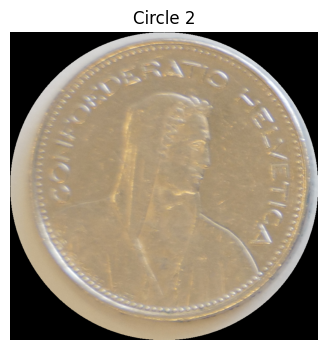

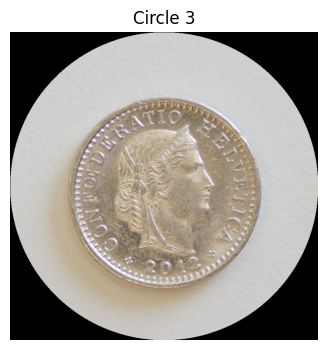

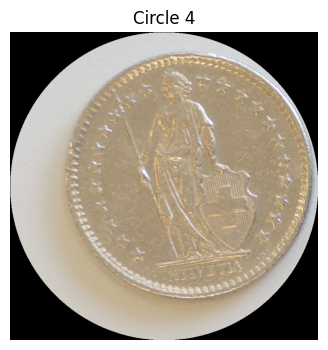

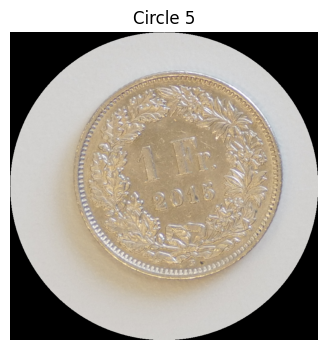

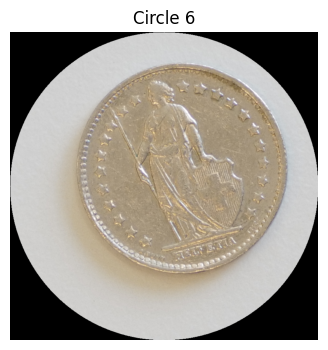

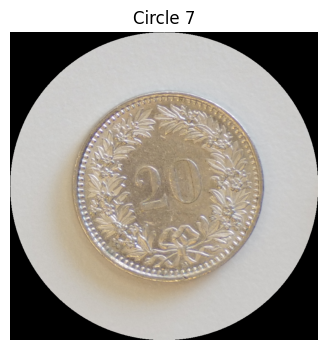

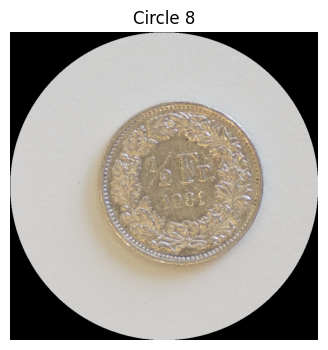

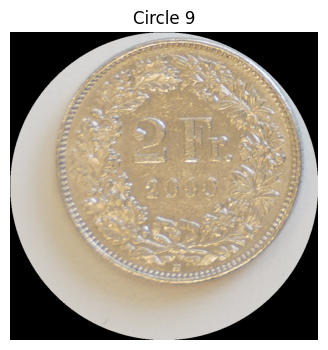

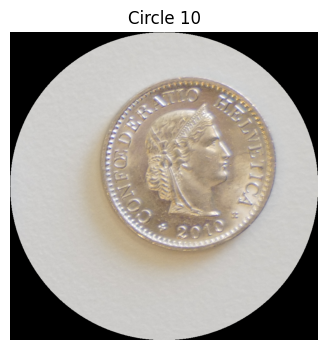

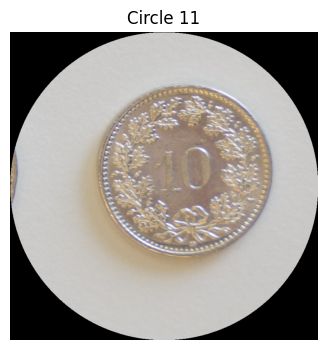

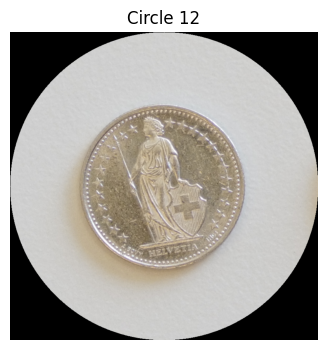

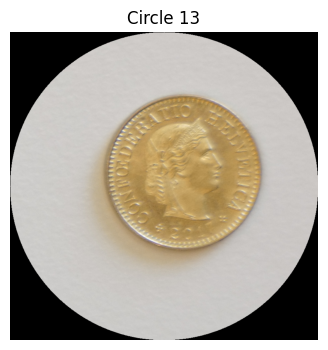

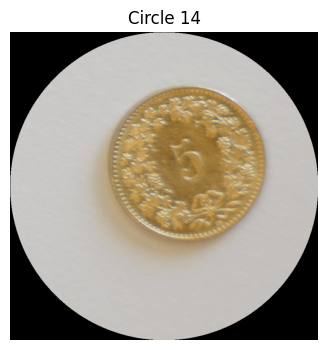

In [9]:
# Cut into a frame circle image of radius 40 (for all)
# Paste into a white blank page 
extracted_images = project_extract_circles_with_transparency('./ref/ref_chf.JPG',circles_chf,scale_percent)